In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from lib.FolderStructure import FolderStructure
from lib.data.DriftData import DriftData
from lib.data.SeeFloor import SeeFloor
from lib.data.DriftRawData import DriftRawData
from lib.data.BadFramesData import BadFramesData

#rootDir ="C:/workspaces/AnjutkaVideo/Kara_Sea_Crab_Video_st_5993_2018/"
#videoFileName = "V3__R_20180915_205551"
#videoFileName = "V4__R_20180915_210447"
#videoFileName = "V6__R_20180915_212238"

#rootDir = "C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBlagopoluchiyaBay2018/"
#videoFileName = "V3_R_20180911_170159"
#videoFileName = "V2_R_20180911_165730"
#videoFileName = "V1_R_20180911_165259"

rootDir ="C:/workspaces/AnjutkaVideo/2019-Kara/St6279_19"
videoFileName = "V1"

folderStruct = FolderStructure(rootDir, videoFileName)

#drifts = DriftData.createFromFolderStruct(folderStruct)
rawDrifts = DriftRawData(folderStruct)
dfRaw = rawDrifts.getPandasDF()
len(dfRaw.index)

18117

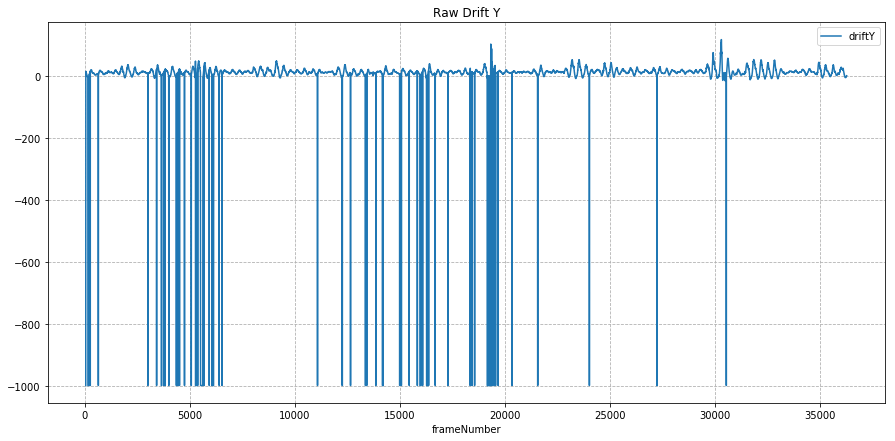

In [2]:
dfRaw.plot( x='frameNumber', y='driftY',figsize=(15,7), title="Raw Drift Y")
plt.gca().grid(which='major', axis='both', linestyle='--') 

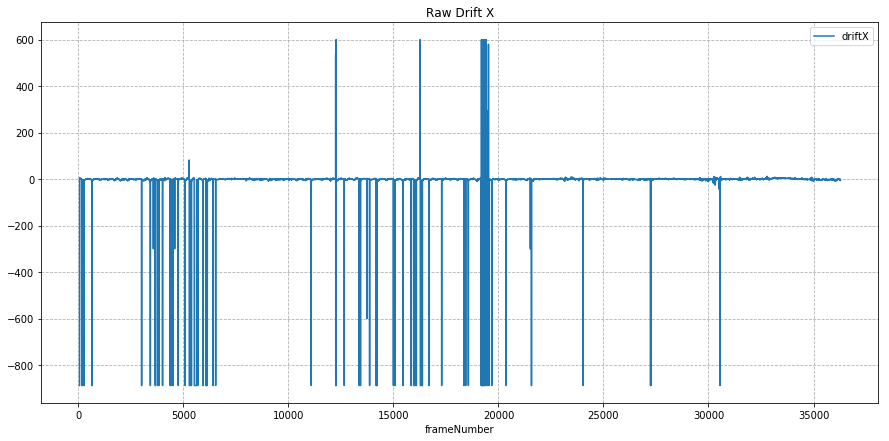

In [3]:
dfRaw.plot( x='frameNumber', y='driftX',figsize=(15,7), title="Raw Drift X")
plt.gca().grid(which='major', axis='both', linestyle='--') 

In [4]:
data = rawDrifts.interpolate()
#data = drifts.getDF()

In [5]:
data.loc[(data['frameNumber'] > 9390)].head(10)

,frameNumber,driftX,driftY
9342,9391,-0.25,2.250
9343,9392,-0.25,2.250
9344,9393,-0.25,2.250
9345,9394,-0.25,2.375
9346,9395,-0.25,2.500
9347,9396,-0.25,2.625
9348,9397,-0.25,2.750
9349,9398,-0.25,2.875
9350,9399,-0.25,3.000
9351,9400,-0.25,3.125


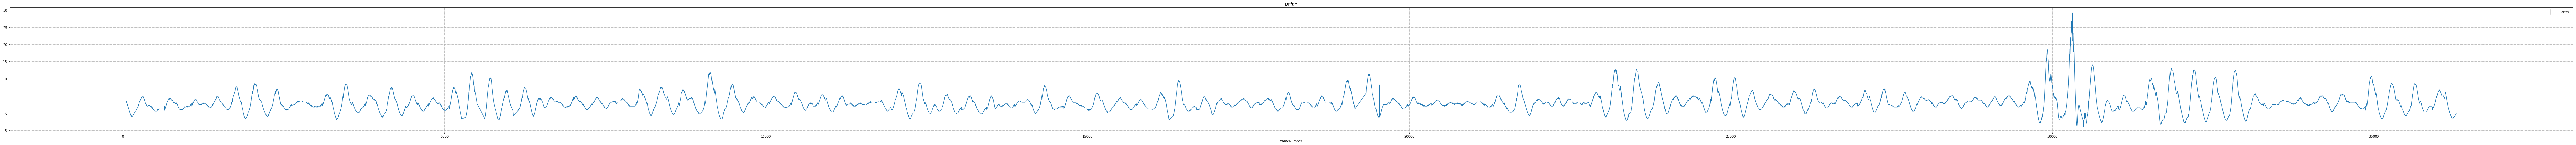

In [6]:
data.plot( x='frameNumber', y='driftY',figsize=(140,7), title="Drift Y")#.savefig('MaximPlotDriftY.png', dpi=300)
plt.gca().grid(which='major', axis='both', linestyle='--') 
#save to File
#plt.savefig('driftsY_7.png', format='png', dpi=300)

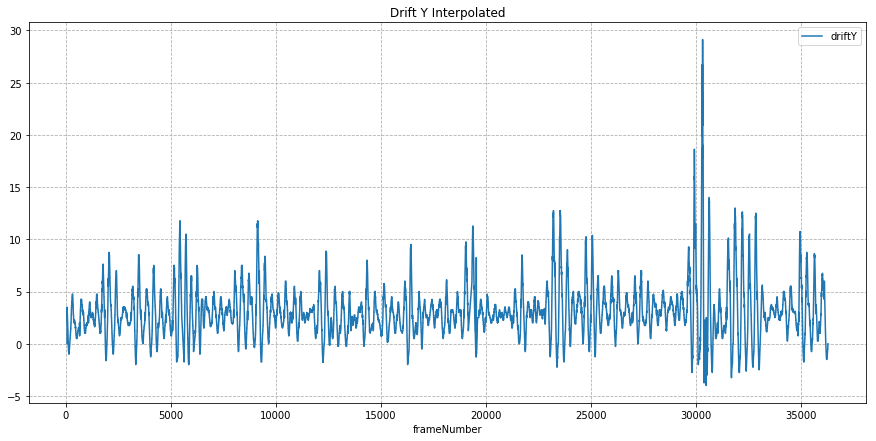

In [7]:
#data.loc[data['frameNumber'] > 3010].loc[data['frameNumber'] < 3400].plot( x='frameNumber', y='driftY',figsize=(15,7))
data.plot( x='frameNumber', y='driftY',figsize=(15,7), title="Drift Y Interpolated")
plt.gca().grid(which='major', axis='both', linestyle='--') 
#data.loc[(data['driftY'] < -30) | (data['driftY'] > 100)].count()[0]


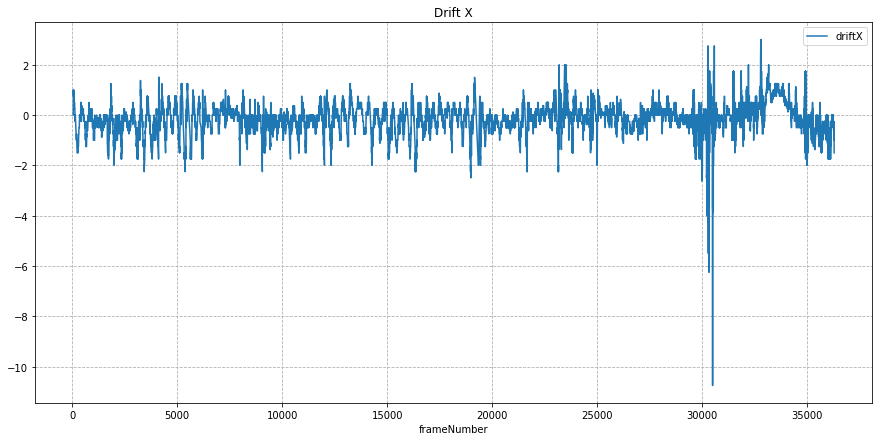

In [8]:
data.plot( x='frameNumber', y='driftX',figsize=(15,7), title="Drift X")
plt.gca().grid(which='major', axis='both', linestyle='--') 

In [9]:
data.loc[(data['driftX'] < -30) | (data['driftX'] > 30)].count()[0]

0

c:\old\python27\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


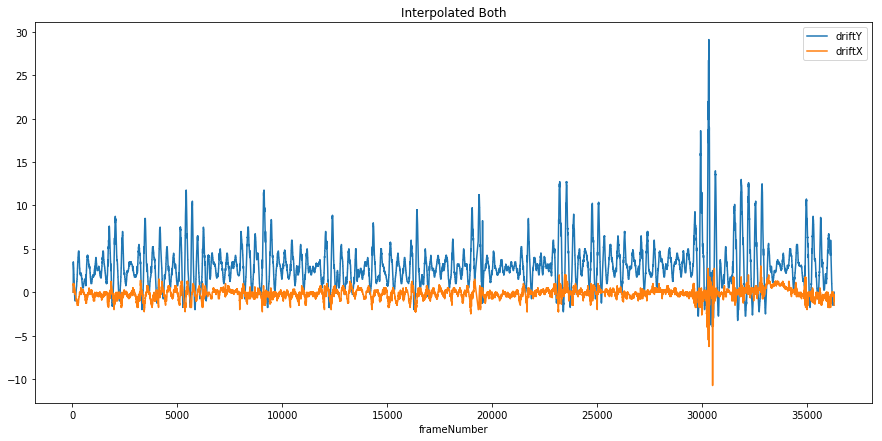

In [10]:
#data.loc[data['driftY'] != data['driftY_orig']].head(10) 
data.plot(x='frameNumber', y=['driftY','driftX'],figsize=(15,7), title="Interpolated Both")

In [41]:
filepath_s2 = "C:/workspaces/AnjutkaVideo/2019-Kara/St6279_19/V2/V2_drifts_interpolated_step2.csv"
dfs2 = pd.read_csv(filepath_s2, delimiter="\t", na_values="(null)")

filepath_s4 = "C:/workspaces/AnjutkaVideo/2019-Kara/St6279_19/V2/V2_drifts_interpolated_step4.csv"
dfs4 = pd.read_csv(filepath_s4, delimiter="\t", na_values="(null)")

filepath_s8 = "C:/workspaces/AnjutkaVideo/2019-Kara/St6279_19/V2/V2_drifts_interpolated_step8.csv"
dfs8 = pd.read_csv(filepath_s8, delimiter="\t", na_values="(null)")

filepath_s8_raw = "C:/workspaces/AnjutkaVideo/2019-Kara/St6279_19/V2/V2_raw_drifts_step8.csv"
dfs8raw = pd.read_csv(filepath_s8_raw, delimiter="\t", na_values="(null)")

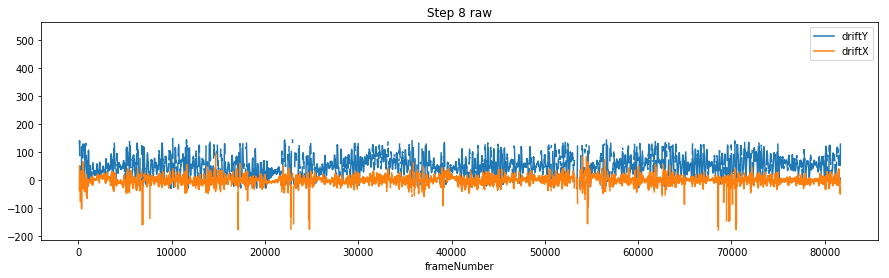

In [42]:
dfs8raw.loc[dfs8raw['driftY'] == -999, ['driftY', 'driftX']] = numpy.nan
dfs8raw.loc[dfs8raw['driftX'] == -888, ['driftX', 'driftY']] = numpy.nan
    
dfs8raw.plot(x='frameNumber', y=['driftY','driftX'],figsize=(15,4), title="Step 8 raw")

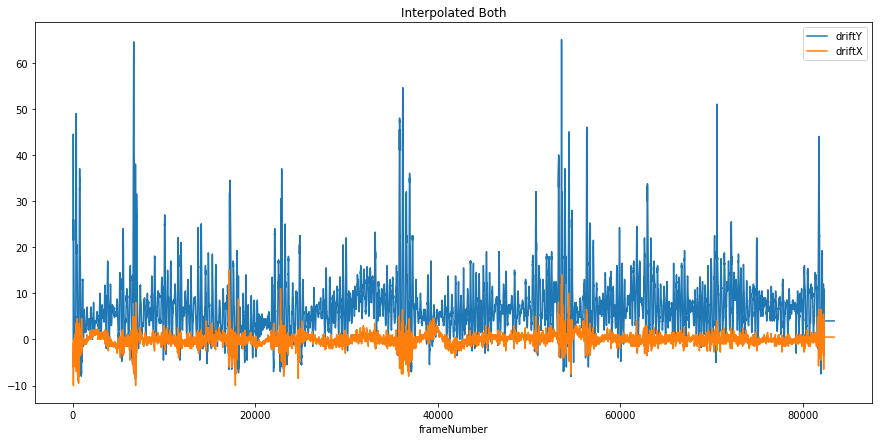

In [20]:
#dfs2[0:10000].plot(x='frameNumber', y=['driftY','driftX'],figsize=(15,7), title="Interpolated Both")
dfs2.plot(x='frameNumber', y=['driftY','driftX'],figsize=(15,7), title="Interpolated Step 2")

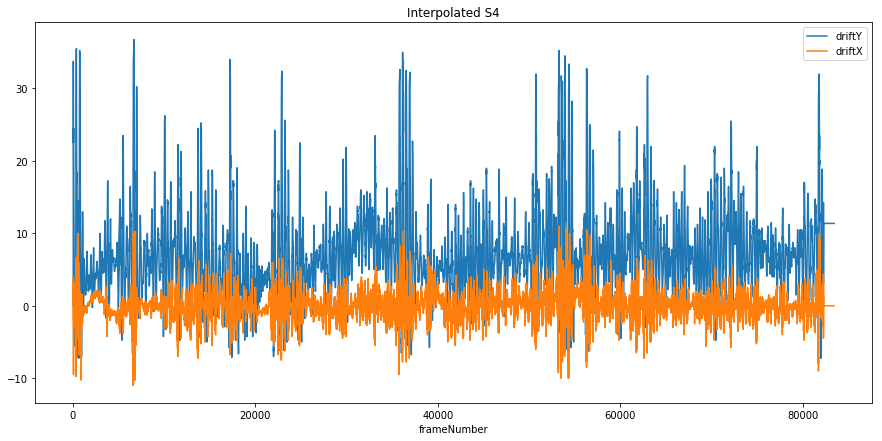

In [21]:
#dfs4[0:10000].plot(x='frameNumber', y=['driftY','driftX'],figsize=(15,7), title="Interpolated S4")
dfs4.plot(x='frameNumber', y=['driftY','driftX'],figsize=(15,7), title="Interpolated S4")

,frameNumber,driftX,driftY
0,61,0.00,0.000
1,62,-4.75,17.625
2,63,-4.75,17.625
3,64,-4.75,17.625
4,65,-4.75,17.625
5,66,-4.75,17.625
6,67,-4.75,17.625
7,68,-4.75,17.625
8,69,-4.75,17.625
9,70,-4.75,17.625


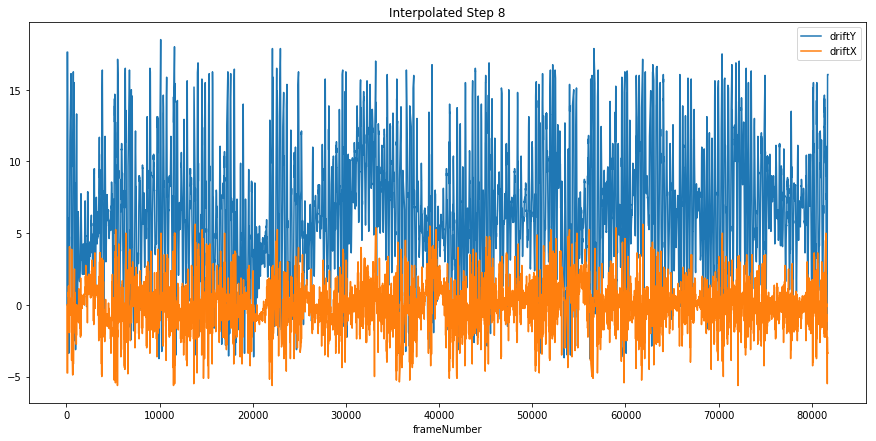

In [61]:
dfs8.plot(x='frameNumber', y=['driftY','driftX'],figsize=(15,7), title="Interpolated Step 8")
dfs8.head(10)

In [89]:
#dfMerged = pd.merge(dfs4[0:10000], dfs2[0:10000], on='frameNumber', how='outer', suffixes=('_s2', '_s4'))
dfMerged = pd.merge(dfs4, dfs2, on='frameNumber', how='outer', suffixes=('_s4', '_s2'))
dfMerged["driftX"] = "" #create empty column 
dfMerged["driftY"] = "" #create empty column 
dfMerged = pd.merge(dfs8, dfMerged, on='frameNumber', how='outer', suffixes=('_s8', ''))
dfMerged = dfMerged.drop(columns=['driftX', 'driftY'])
dfMerged.head(10)

,frameNumber,driftX_s8,driftY_s8,driftX_s4,driftY_s4,driftX_s2,driftY_s2
0,61,0.00,0.000,0.00000,0.000000,0.0,0.000
1,62,-4.75,17.625,4.00000,33.750000,-4.0,44.500
2,63,-4.75,17.625,4.00000,33.750000,-4.0,44.500
3,64,-4.75,17.625,4.00000,33.750000,-4.0,44.500
4,65,-4.75,17.625,4.00000,33.750000,-4.0,44.500
5,66,-4.75,17.625,4.00000,33.750000,-4.0,44.500
6,67,-4.75,17.625,4.00000,33.750000,-4.0,44.500
7,68,-4.75,17.625,4.00000,33.750000,-5.0,41.875
8,69,-4.75,17.625,4.00000,33.750000,-6.0,39.250
9,70,-4.75,17.625,3.15625,33.046875,-7.0,36.625


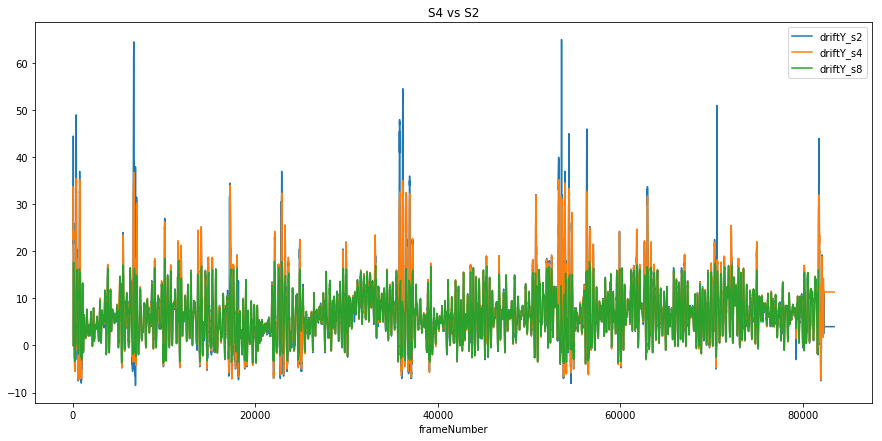

In [90]:
dfMerged.plot(x='frameNumber', y=['driftY_s2','driftY_s4', 'driftY_s8'],figsize=(15,7), title="S4 vs S2")

In [48]:
dfSub = dfMerged[["frameNumber", "driftX_s2", "driftX_s4", "driftY_s2", "driftY_s4"]]
dfSub["diffX"] = dfSub["driftX_s2"]  - dfSub["driftX_s4"]
dfSub["diffY"] = dfSub["driftY_s2"]  - dfSub["driftY_s4"]
dfSub["diffX_perc"] =(dfSub["diffX"]/dfSub["driftX_s2"] > 0.5) | (dfSub["diffX"]/dfSub["driftX_s4"] >0.5)  
dfSub["diffSize"] = (abs(dfSub["diffX"]) >2 ) & (dfSub["diffX_perc"])
dfSub[510:590].head(10)

c:\old\python27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,frameNumber,driftX_s2,driftX_s4,driftY_s2,driftY_s4,diffX,diffY,diffX_perc,diffSize
510,571,1.50,0.68750,-2.00,-2.0000,0.81250,0.0000,True,False
511,572,1.25,1.03125,-2.25,-2.3750,0.21875,0.1250,False,False
512,573,1.00,1.37500,-2.50,-2.7500,-0.37500,0.2500,False,False
513,574,1.00,3.53125,-3.00,-2.3125,-2.53125,-0.6875,False,False
514,575,1.00,5.68750,-3.50,-1.8750,-4.68750,-1.6250,False,False
515,576,0.50,7.84375,-3.50,-1.4375,-7.34375,-2.0625,False,False
516,577,0.00,10.00000,-3.50,-1.0000,-10.00000,-2.5000,False,False
517,578,-0.25,7.56250,-3.75,-2.0625,-7.81250,-1.6875,True,True
518,579,-0.50,5.12500,-4.00,-3.1250,-5.62500,-0.8750,True,True
519,580,-1.75,2.68750,-2.00,-4.1875,-4.43750,2.1875,True,True


In [26]:
len(dfSub[dfSub["diffSize"]==True].index)

7833

In [18]:
#dfSub[dfSub["diffSize"]==True]

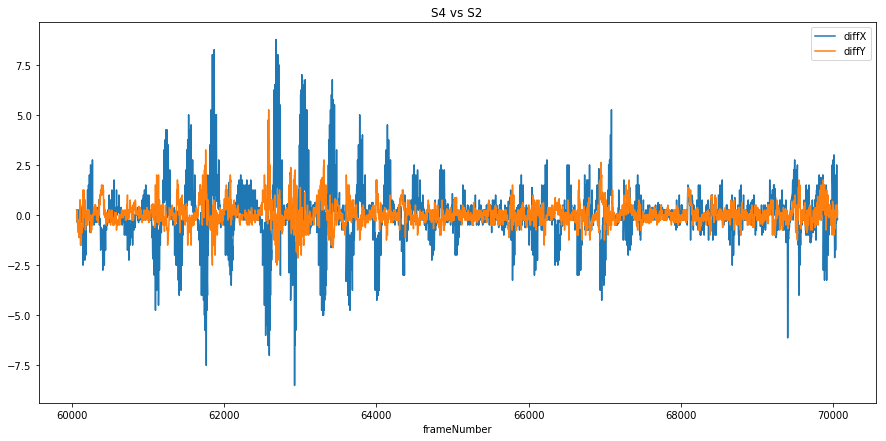

In [31]:
dfSub[60000:70000].plot(x='frameNumber', y=['diffX','diffY'], figsize=(15,7), title="S4 vs S2")